## K-Means
* Common clustering technique, helps to solve many problems efficiently.
* K-means is an example of Hard Clustering, where every point belongs to only one cluster.

**Problem** **Statement** **:** Given the list of locations of customers who frequently order pizza. We want to find of optimal locations of Pizza Parlours where they should be opened.

1. Initialize Pizza Parlour centers randomly.
2. Assign each customer to its nearest Pizza Center.
3. Update the location by taking the mean of the customers assigned to it.
4. Repeat 2 and 3 until converge.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
X,y = make_blobs(n_samples=500,n_features=2,centers=5,random_state=11)

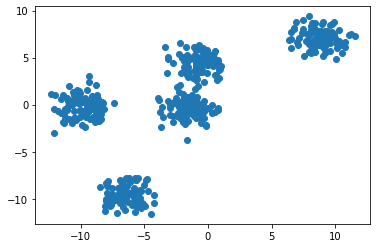

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [4]:
k=5
colors=['Green','Red','Blue','Yellow','Orange']
clusters={}

for i in range(k):
    np.random.seed(i)
    center=10*(2*np.random.random((X.shape[1]))-1)
    points=[]
    
    cluster={
        'center':center,
        'points':points,
        'color':colors[i]
    }
    clusters[i]=cluster

In [5]:
def distance(a,b):
    return np.sqrt(sum((a-b)**2))

In [6]:
def assign_points(clusters):
    for i in range(X.shape[0]):
        dist=[]
        curr_x=X[i]

        for j in range(k):
            dist.append(distance(curr_x,clusters[j]['center']))

        assigned_cluster=np.argmin(dist)
        clusters[assigned_cluster]['points'].append(curr_x)

In [7]:
def update_clusters(clusters):
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            new_u=pts.mean(axis=0)
            clusters[i]['center']=new_u
            clusters[i]['points']=[]

In [8]:
def plot_clusters(clusters):
    for i in range(k):
        pts=np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:,0],pts[:,1],color=clusters[i]['color'])
        except:
            pass
        
        cluster_center=clusters[i]['center']
        plt.scatter(cluster_center[0],cluster_center[1],color='black',marker='*')
    plt.show()

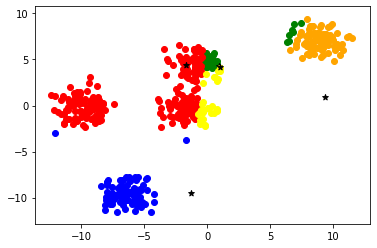

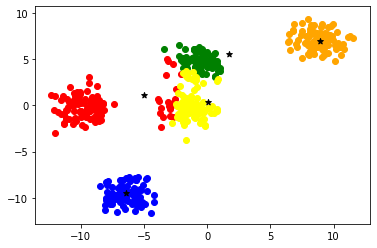

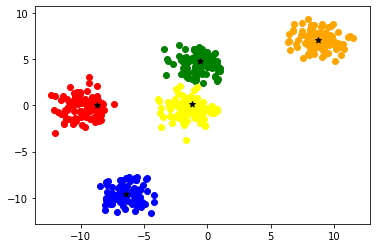

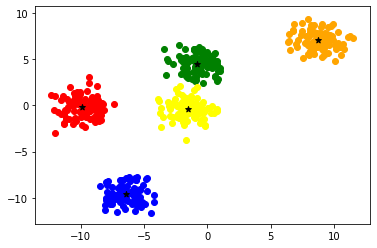

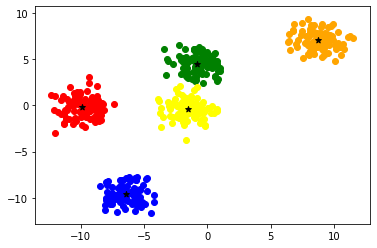

In [9]:
for i in range(5):
    assign_points(clusters)
    plot_clusters(clusters)
    update_clusters(clusters)